In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.dates as mdates
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy import stats

ImportError: numpy.core.multiarray failed to import

In [28]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

ImportError: numpy.core.multiarray failed to import

In [21]:
from scipy import stats

In [9]:
file_path = "files/In house exam data set (dummy).csv"
data = pd.read_csv(file_path, encoding="UTF-8")

In [11]:
data

,Date,Temp.,pH,ORP,DO,Transpa.,E-NH4-N,E-NO3-N,E-NO2-N,SS,...,C-BOD,N-BOD,T-N,NH4-N,NOx-N,NO3-N,NO2-N,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,4-Jan,12.3,7.5,97.0,7.6,58.0,2.3,5.8,0.9,12.5,...,4.5,2.7,14.5,6.2,8.3,6.9,1.4,NaN,NaN,NaN
1,11-Jan,13.1,6.9,81.0,7.2,94.0,1.8,6.2,1.1,14.2,...,3.8,4.7,10.7,5.4,5.3,3.1,2.2,NaN,NaN,NaN
2,18-Jan,14.0,7.2,110.0,7.8,71.0,2.1,5.5,1.4,10.8,...,4.1,2.8,13.0,6.5,6.5,8.7,4.1,NaN,NaN,NaN
3,25-Jan,13.2,7.8,74.0,7.7,47.0,1.6,5.9,1.3,13.4,...,3.4,4.2,11.9,5.9,6.0,4.5,1.5,NaN,NaN,NaN
4,1-Feb,14.8,7.1,105.0,7.5,88.0,2.0,5.4,0.8,11.7,...,3.9,4.3,12.8,6.7,6.1,7.2,5.3,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.head()

,Date,Temp.,pH,ORP,DO,Transpa.,E-NH4-N,E-NO3-N,E-NO2-N,SS,...,C-BOD,N-BOD,T-N,NH4-N,NOx-N,NO3-N,NO2-N,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,4-Jan,12.3,7.5,97.0,7.6,58.0,2.3,5.8,0.9,12.5,...,4.5,2.7,14.5,6.2,8.3,6.9,1.4,NaN,NaN,NaN
1,11-Jan,13.1,6.9,81.0,7.2,94.0,1.8,6.2,1.1,14.2,...,3.8,4.7,10.7,5.4,5.3,3.1,2.2,NaN,NaN,NaN
2,18-Jan,14.0,7.2,110.0,7.8,71.0,2.1,5.5,1.4,10.8,...,4.1,2.8,13.0,6.5,6.5,8.7,4.1,NaN,NaN,NaN
3,25-Jan,13.2,7.8,74.0,7.7,47.0,1.6,5.9,1.3,13.4,...,3.4,4.2,11.9,5.9,6.0,4.5,1.5,NaN,NaN,NaN
4,1-Feb,14.8,7.1,105.0,7.5,88.0,2.0,5.4,0.8,11.7,...,3.9,4.3,12.8,6.7,6.1,7.2,5.3,NaN,NaN,NaN


In [7]:
data.shape

(69, 21)

In [8]:
data.columns.tolist()

['Date',
 'Temp.',
 'pH',
 'ORP',
 'DO',
 'Transpa.',
 'E-NH4-N',
 'E-NO3-N',
 'E-NO2-N',
 'SS',
 'BOD',
 'C-BOD',
 'N-BOD',
 'T-N',
 'NH4-N',
 'NOx-N',
 'NO3-N',
 'NO2-N',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20']

In [12]:
data["Date"] = pd.to_datetime(data['Date'] + '-2023', format='%d-%b-%Y')

In [13]:
data["Date"].head()

0   2023-01-04
1   2023-01-11
2   2023-01-18
3   2023-01-25
4   2023-02-01
Name: Date, dtype: datetime64[ns]

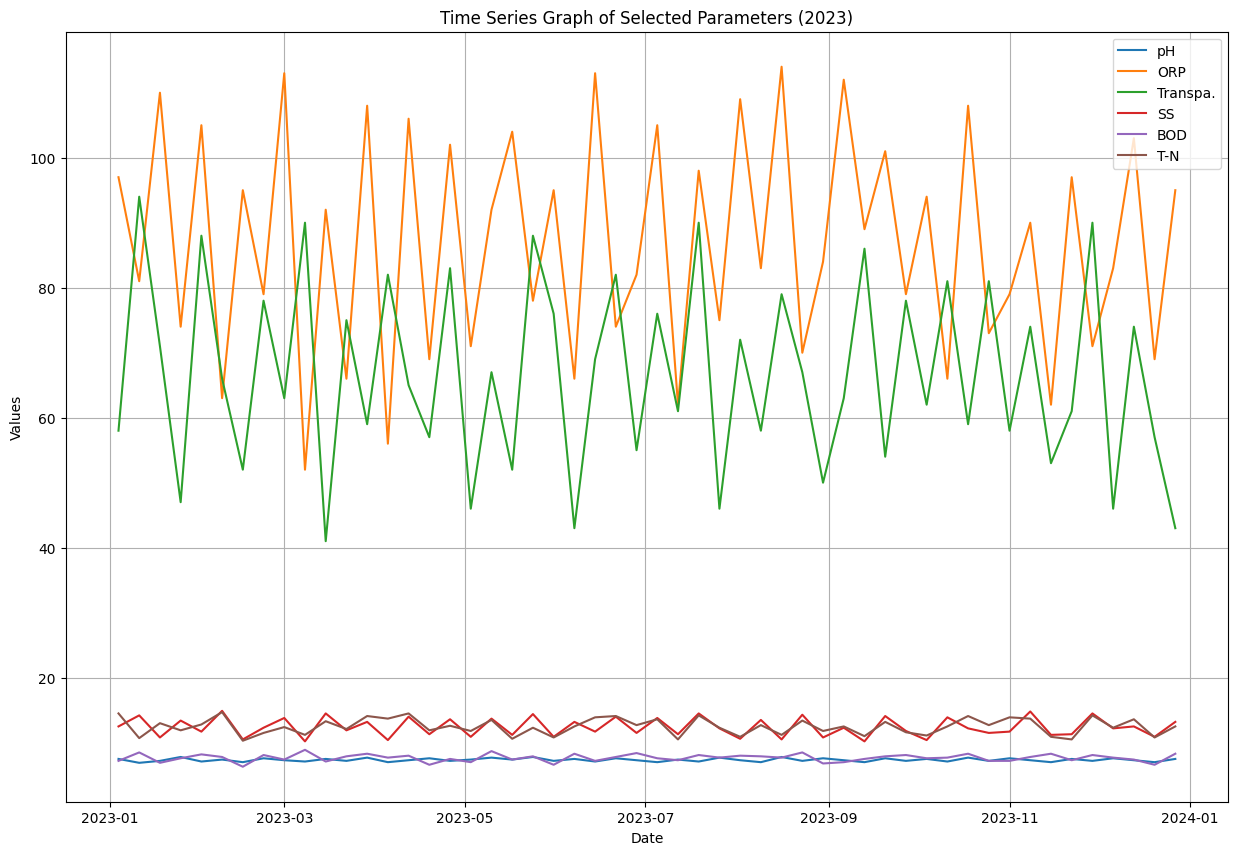

In [16]:
columns_to_plot = ['pH', 'ORP', 'Transpa.', 'SS', 'BOD', 'T-N']
plt.figure(figsize=(15, 10))
for col in columns_to_plot:
    plt.plot(data['Date'], data[col], label=col)

plt.title('Time Series Graph of Selected Parameters (2023)')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

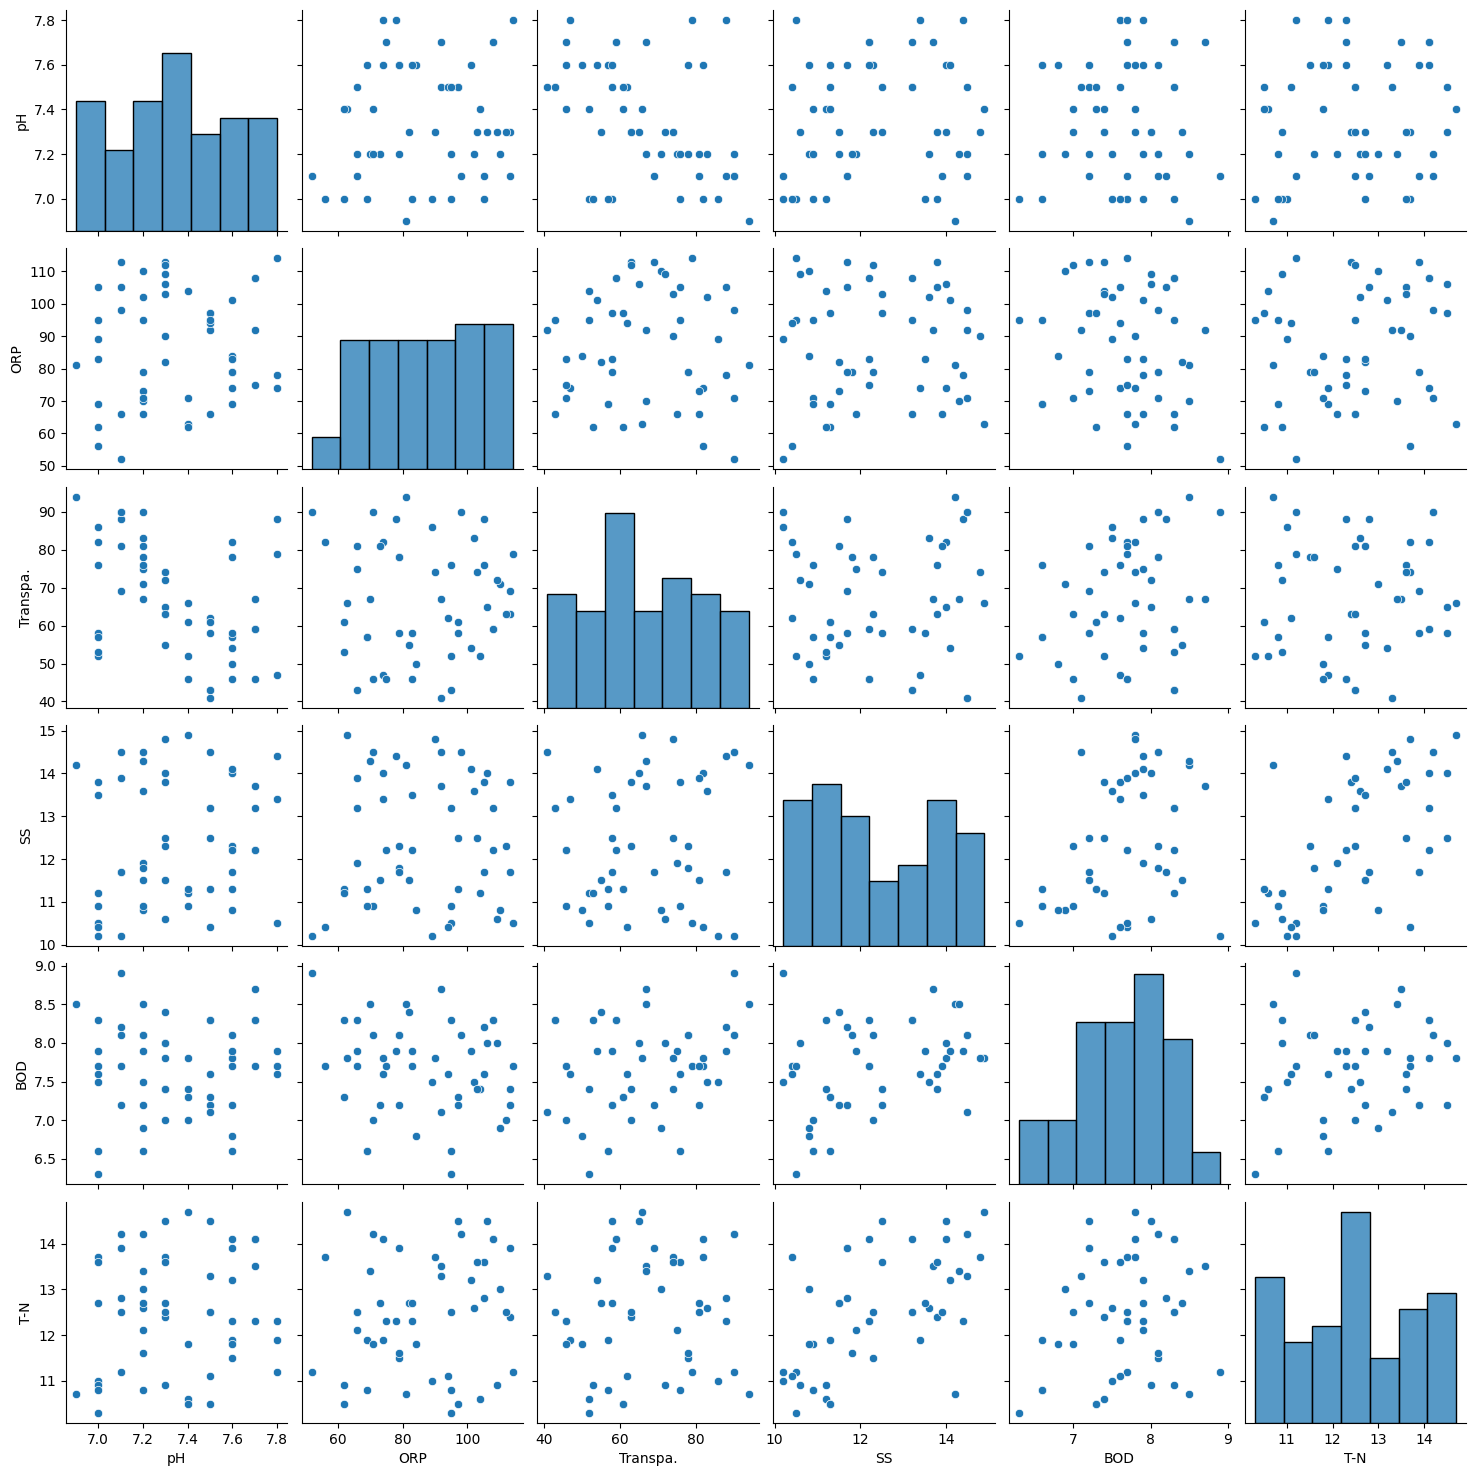

In [18]:
sns.pairplot(data[columns_to_plot])
plt.show()

ValueError: array must not contain infs or NaNs

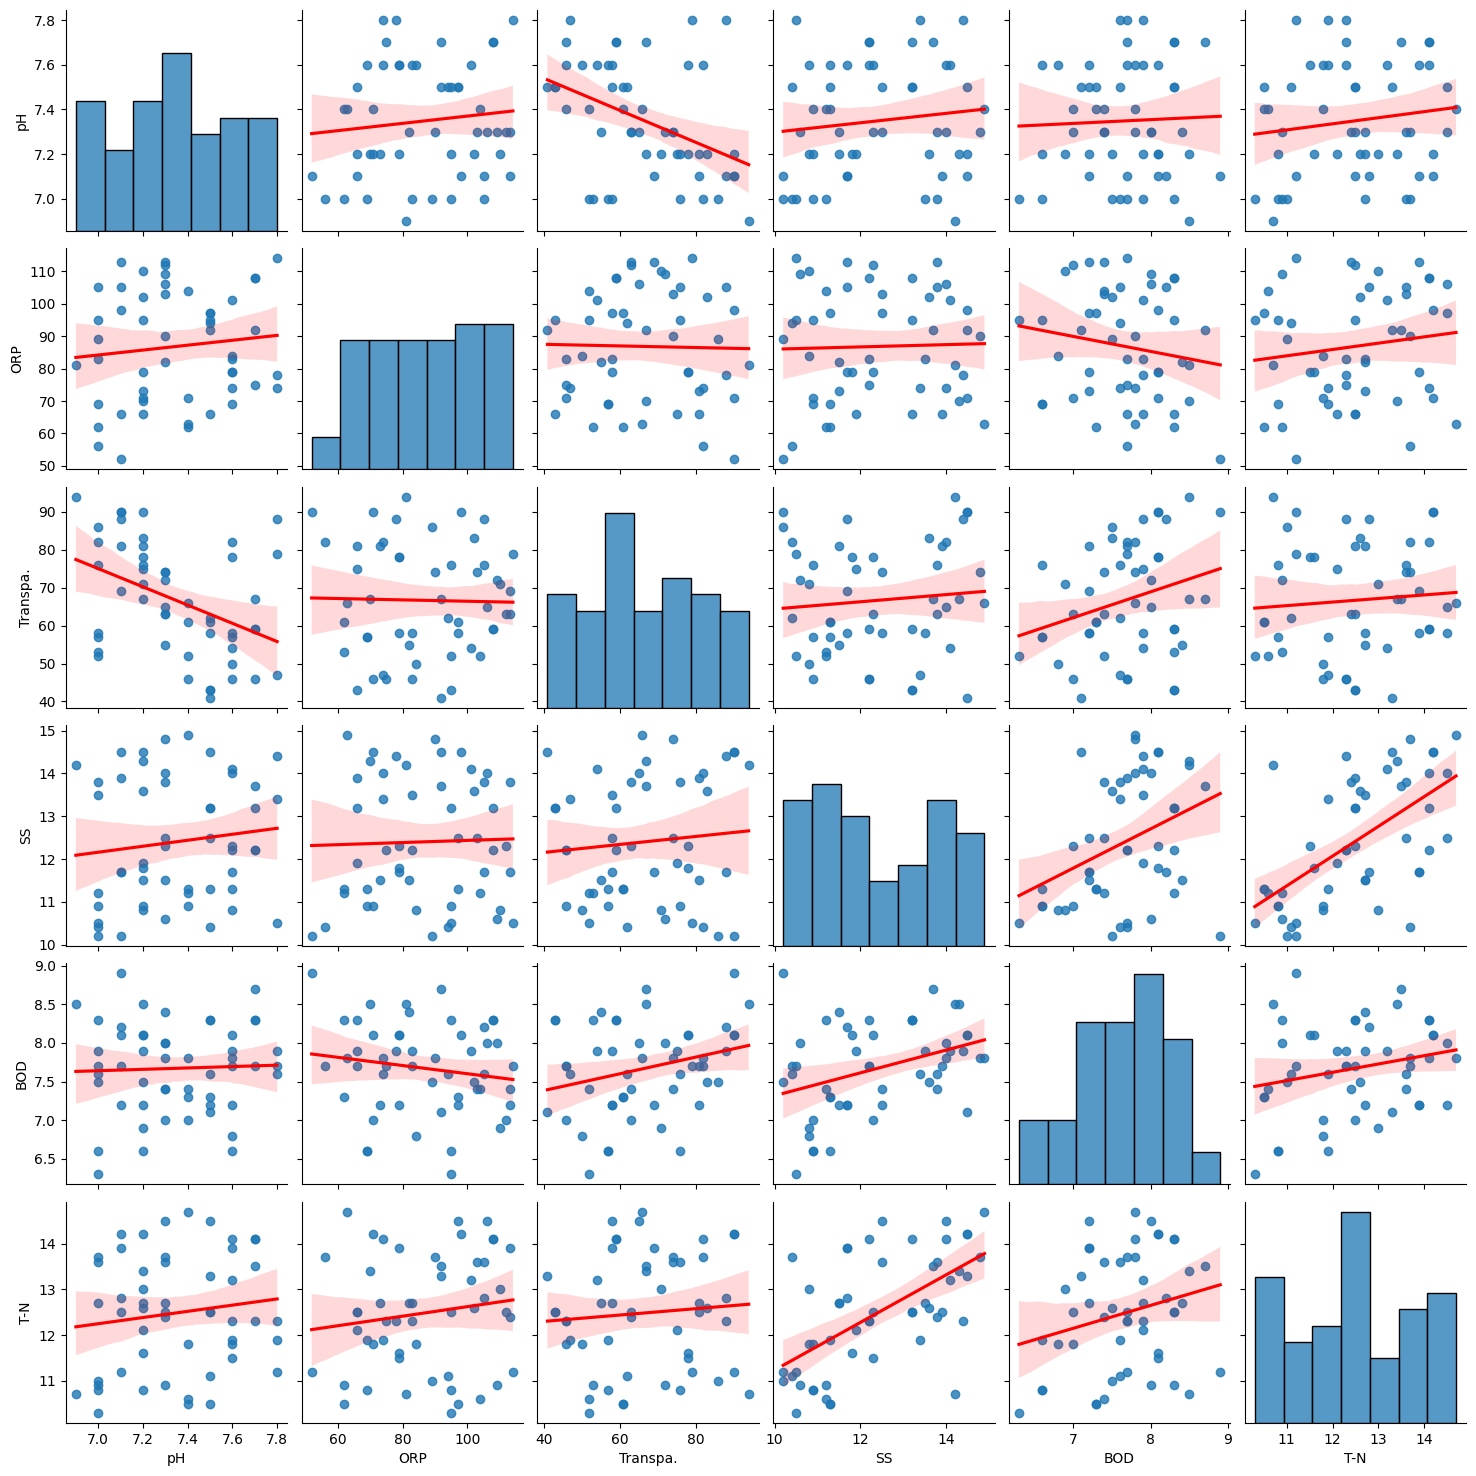

In [22]:
# 相関係数を計算し表示する関数
def corr_func(x, y, **kwargs):
    r = stats.pearsonr(x, y)[0]
    ax = plt.gca()
    ax.annotate(f'r = {r:.2f}', xy=(0.05, 0.9), xycoords=ax.transAxes)

# Seabornのpairplotを作成
pairplot = sns.pairplot(data[columns_to_plot], kind='reg', plot_kws={'line_kws': {'color': 'red'}})

# 非対角要素に相関係数を表示
pairplot.map_offdiag(corr_func)
plt.show()

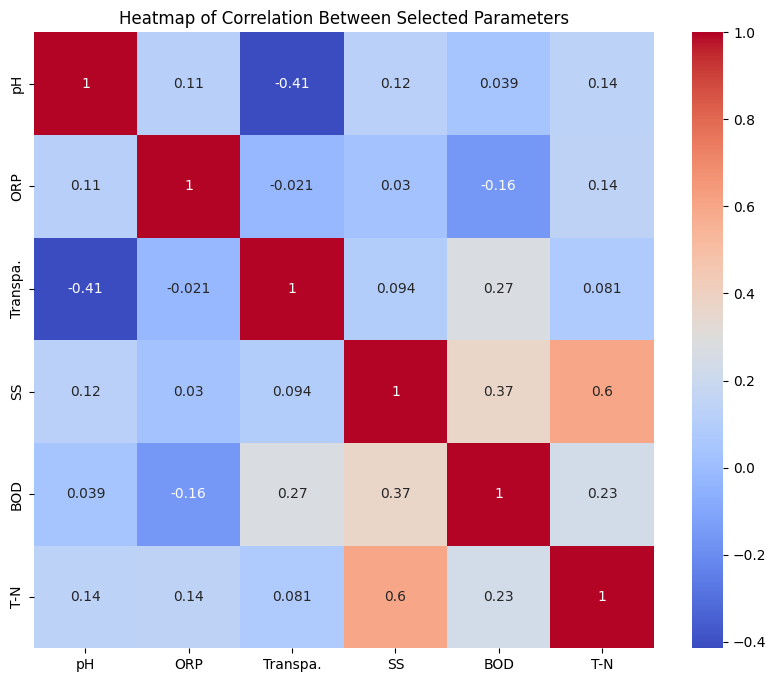

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[columns_to_plot].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Between Selected Parameters')
plt.show()

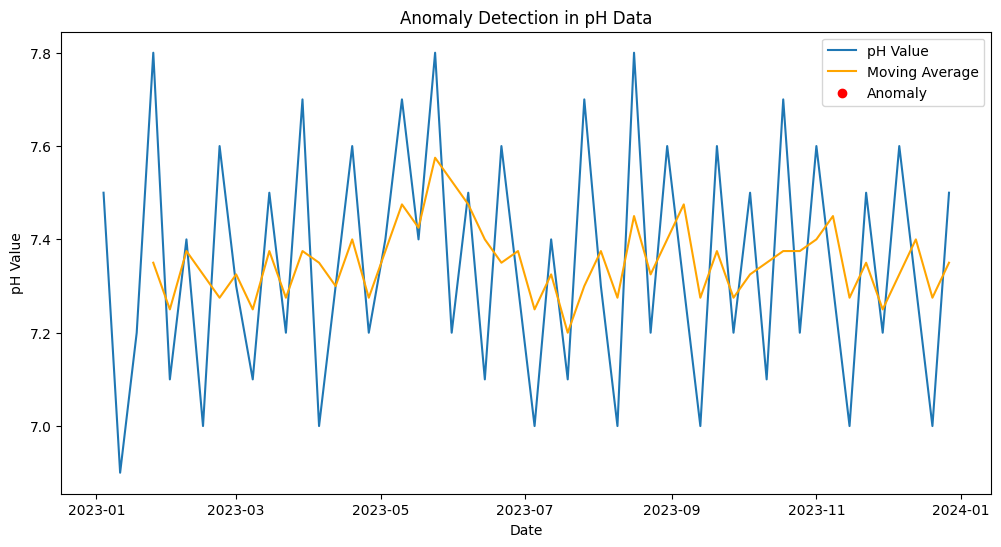

In [25]:
# Extracting pH data
pH_data = data[['Date', 'pH']].set_index('Date')

# Check for missing values
pH_data.isna().sum()

# Dropping rows with missing values for analysis
pH_data.dropna(inplace=True)

# Calculating moving average and moving standard deviation
window = 4  # Window size for moving calculations
pH_data['Moving_Avg'] = pH_data['pH'].rolling(window=window).mean()
pH_data['Moving_Std'] = pH_data['pH'].rolling(window=window).std()

# Defining a threshold for anomaly detection (e.g., 2 standard deviations from the moving average)
threshold = 2
pH_data['Anomaly'] = (pH_data['pH'] > pH_data['Moving_Avg'] + threshold * pH_data['Moving_Std']) | \
                     (pH_data['pH'] < pH_data['Moving_Avg'] - threshold * pH_data['Moving_Std'])

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(pH_data['pH'], label='pH Value')
plt.plot(pH_data['Moving_Avg'], color='orange', label='Moving Average')

# Highlighting the anomalies
plt.scatter(pH_data.index[pH_data['Anomaly']], pH_data['pH'][pH_data['Anomaly']], color='red', label='Anomaly')

plt.title('Anomaly Detection in pH Data')
plt.xlabel('Date')
plt.ylabel('pH Value')
plt.legend()
plt.show()

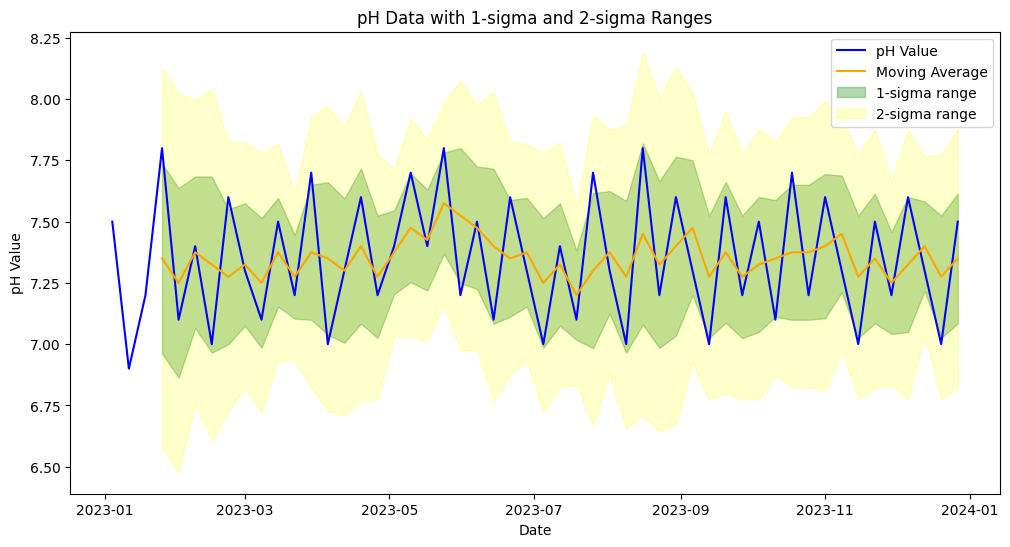

In [26]:
# Calculating 1-sigma and 2-sigma boundaries
pH_data['1_sigma_upper'] = pH_data['Moving_Avg'] + 1 * pH_data['Moving_Std']
pH_data['1_sigma_lower'] = pH_data['Moving_Avg'] - 1 * pH_data['Moving_Std']
pH_data['2_sigma_upper'] = pH_data['Moving_Avg'] + 2 * pH_data['Moving_Std']
pH_data['2_sigma_lower'] = pH_data['Moving_Avg'] - 2 * pH_data['Moving_Std']

# Plotting the results with 1-sigma and 2-sigma boundaries
plt.figure(figsize=(12, 6))
plt.plot(pH_data['pH'], label='pH Value', color='blue')
plt.plot(pH_data['Moving_Avg'], color='orange', label='Moving Average')

# 1-sigma boundaries
plt.fill_between(pH_data.index, pH_data['1_sigma_lower'], pH_data['1_sigma_upper'], color='green', alpha=0.3, label='1-sigma range')

# 2-sigma boundaries
plt.fill_between(pH_data.index, pH_data['2_sigma_lower'], pH_data['2_sigma_upper'], color='yellow', alpha=0.2, label='2-sigma range')

plt.title('pH Data with 1-sigma and 2-sigma Ranges')
plt.xlabel('Date')
plt.ylabel('pH Value')
plt.legend()
plt.show()

In [27]:
# Extracting pH data
pH_data = data[['Date', 'pH']].set_index('Date')

# Check for missing values
pH_data.isna().sum()

# Dropping rows with missing values for analysis
pH_data.dropna(inplace=True)

# Seasonal Decompose to analyze trend, seasonality, and residuals
decomposed = seasonal_decompose(pH_data['pH'], model='additive', period=12)

# ARIMA model for both trend and seasonality
# Choosing ARIMA parameters (p,d,q) can be done using AIC, BIC or grid search, here we use common parameters
arima_model = ARIMA(pH_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
arima_result = arima_model.fit()

# Plotting the results
fig, axes = plt.subplots(4, 1, figsize=(15, 12))

# Plotting original series
axes[0].plot(pH_data, label='Original')
axes[0].legend(loc='upper left')
axes[0].set_title('Original pH Series')

# Plotting trend component
axes[1].plot(decomposed.trend, label='Trend')
axes[1].legend(loc='upper left')
axes[1].set_title('Trend Component of pH')

# Plotting seasonal component
axes[2].plot(decomposed.seasonal, label='Seasonal')
axes[2].legend(loc='upper left')
axes[2].set_title('Seasonal Component of pH')

# Plotting ARIMA Predicted values
axes[3].plot(pH_data, label='Original')
axes[3].plot(arima_result.fittedvalues, label='ARIMA Fitted', color='red')
axes[3].legend(loc='upper left')
axes[3].set_title('ARIMA Model Fitted Values')
axes[3].xaxis.set_major_locator(mdates.MonthLocator())
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.tight_layout()
plt.show()

NameError: name 'ARIMA' is not defined